<a href="https://colab.research.google.com/github/JayedTamim/Thesis-All-Code/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Covid-19 Prediction using RandomForest***

# **Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('tamim11.csv')

In [ ]:
#To show the head of dataset
df.head()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
0,44,0,97,86,102,Negative
1,50,1,85,115,96,Positive
2,34,1,85,52,99,Positive
3,69,1,94,61,102,Positive
4,44,0,95,103,103,Negative


In [ ]:
#count the dataset shape
df.shape

(367, 6)

In [ ]:
#To show the tail of dataset
df.tail()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
362,65,0,93,90,97,Negative
363,76,0,92,102,103,Positive
364,72,0,85,79,97,Positive
365,46,1,88,109,104,Positive
366,65,0,91,94,97,Negative


In [ ]:
# Statistical summary
df.describe()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature
count,367.000000,367.00000,367.00000,367.000000,367.000000
mean,50.024523,0.46594,92.93733,84.277929,99.948229
std,17.863231,0.49952,4.41729,26.470401,3.327324
min,0.000000,0.00000,85.00000,40.000000,95.000000
25%,38.500000,0.00000,90.00000,61.500000,97.000000
50%,49.000000,0.00000,93.00000,86.000000,100.000000
75%,64.000000,1.00000,96.50000,105.000000,103.000000
max,104.000000,1.00000,100.00000,130.000000,105.000000


# **DATA PRE PROCESSING**

In [ ]:
#count the missing values
df.isna().sum()

Age                0
ShortnessBreath    0
Oxygen             0
PulseRate          0
Temperature        0
Result             0
dtype: int64

In [ ]:
#If the number of rows with missing values is small,then remove those rows.
df = df.dropna()


# Replace missing values with the mean.

In [ ]:
df.fillna(df.mean(), inplace=True)


<ipython-input-9-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# Data splitting

In [ ]:
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dealing with Duplicates

In [ ]:
dataset_path = 'tamim11.csv'

df = pd.read_csv(dataset_path)
num_duplicates = df.duplicated().sum()

print(f"Number of Duplicates in '{dataset_path}': {num_duplicates}")

Number of Duplicates in 'tamim11.csv': 0


# label encoding

In [ ]:
df['Result'].replace(['Positive', 'Negative'], [1, 0], inplace=True)


In [ ]:
df['Result'].unique()

array([0, 1])

# **DATA VISUALIZATION**

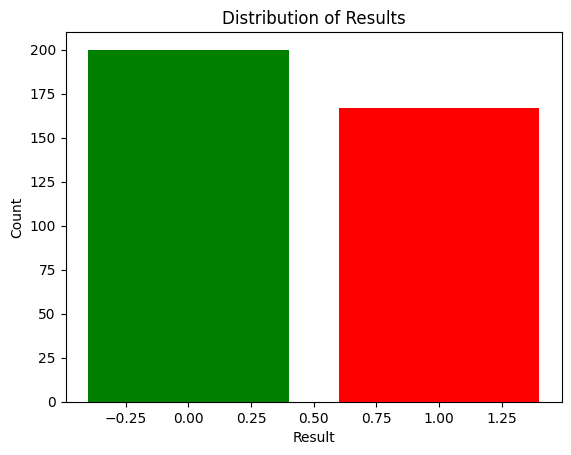

In [ ]:
# Count the occurrences of each result
result_counts = df['Result'].value_counts()

# Plot the bar chart
plt.bar(result_counts.index, result_counts.values, color=['green', 'red'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Results')
plt.show()


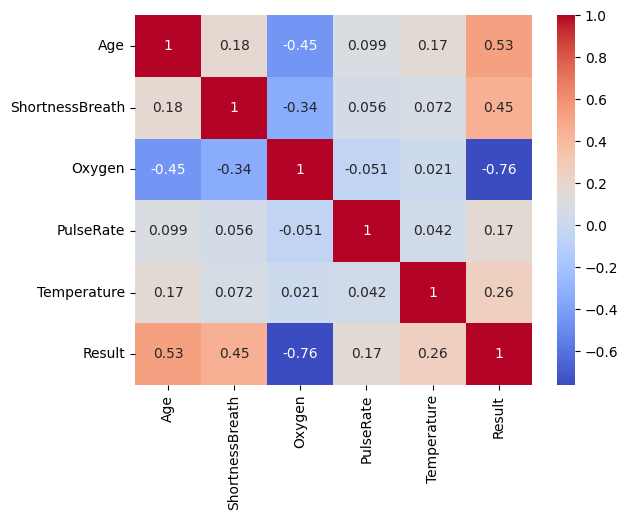

In [ ]:
#Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

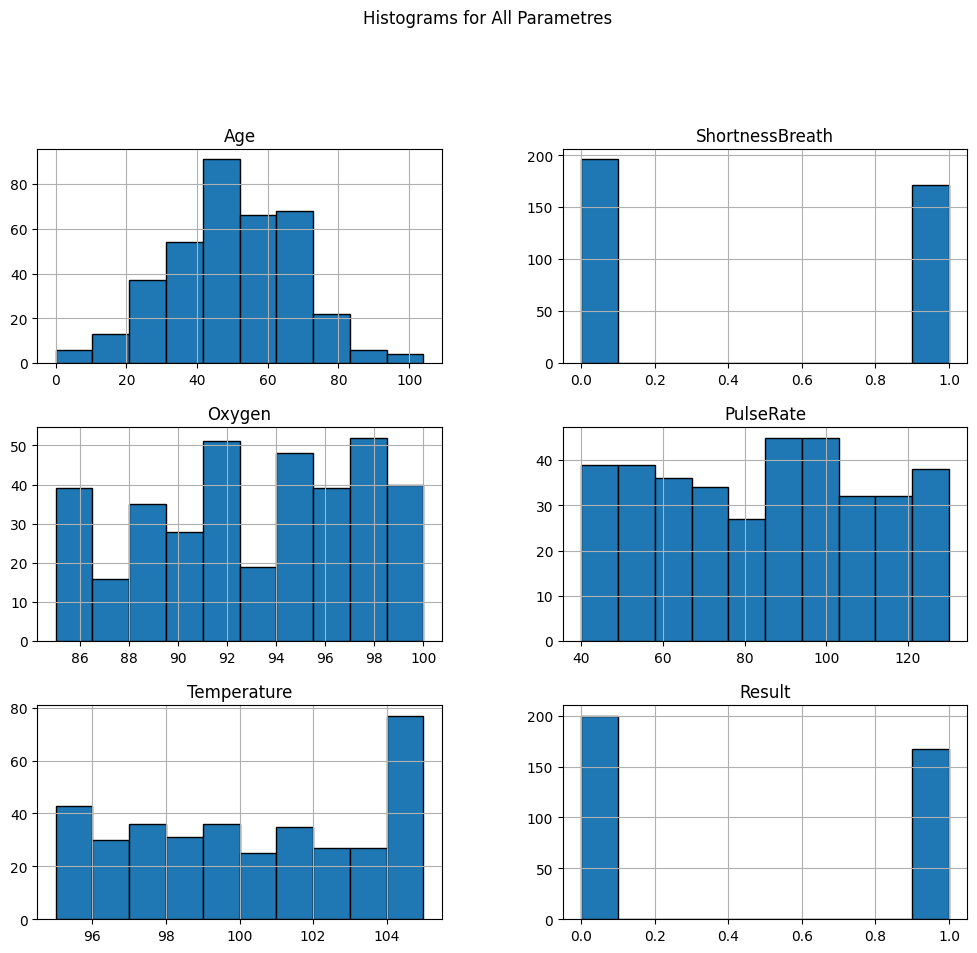

In [ ]:
#HISTOGRAM

# DataFrame called 'df'
df.hist(figsize=(12, 10), bins=10,edgecolor='black')
plt.suptitle("Histograms for All Parametres", y=1.02)
plt.show()


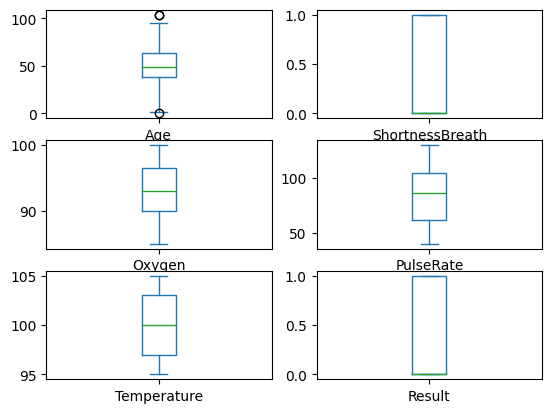

In [ ]:
# Box and Whisker Plots
df.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False)
plt.show()

<Axes: >

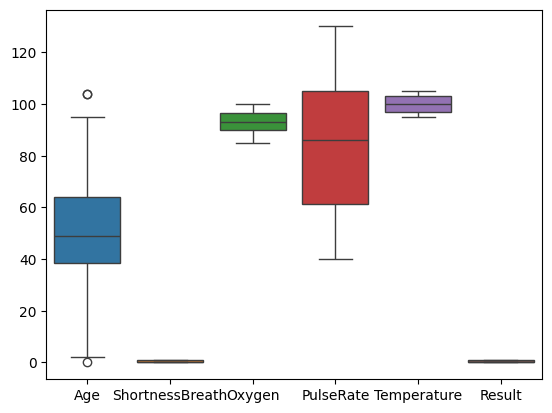

In [ ]:
# Boxplot with vertical orientation, variables side by side
# Much simpler parameters
sns.boxplot(data = df, orient = "v")

# **NORMALIZATION**

In [ ]:
# Importing MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
array = df.values  # Take the data and place it in an object called 'array'

# Separating the array into input (X) and output (Y) components

# The dataset has 5 columns ('Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature'),
# the first 4 of which are predictors.
X = array[:, 0:4]

# The last column ('Result') is the target class
Y = array[:, 4]

# Generating the new scale (normalizing the data)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit for predictor variables
rescaledX = scaler.fit_transform(X)

# Summarizing the transformed data
print("Original Data:\n\n", df.values)
print("\nStandardized Data:\n\n", rescaledX[0:5, :])


Original Data:

 [[ 44   0  97  86 102   0]
 [ 50   1  85 115  96   1]
 [ 34   1  85  52  99   1]
 ...
 [ 72   0  85  79  97   1]
 [ 46   1  88 109 104   1]
 [ 65   0  91  94  97   0]]

Standardized Data:

 [[0.42307692 0.         0.8        0.51111111]
 [0.48076923 1.         0.         0.83333333]
 [0.32692308 1.         0.         0.13333333]
 [0.66346154 1.         0.6        0.23333333]
 [0.42307692 0.         0.66666667 0.7       ]]


# **RANDOM FOREST**

# **TRAIN THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#dataset is stored in a DataFrame called 'df'
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **EVALUATE MODEL PERFORMANCE**

In [ ]:

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_percentage_rf = accuracy_rf * 100

print(f"Random Forest Test Accuracy: {accuracy_percentage_rf:.2f}%")

Random Forest Test Accuracy: 97.30%


# **OVERFITTING & UNDERFITTING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 'df' is your DataFrame
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predictions on training set
y_train_pred = rf_model.predict(X_train)

# Predictions on validation set
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy on training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)

print(f"Training Set Accuracy: {accuracy_train}")
print(f"Validation Set Accuracy: {accuracy_val}")


Training Set Accuracy: 1.0
Validation Set Accuracy: 0.972972972972973


# **SHOW CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

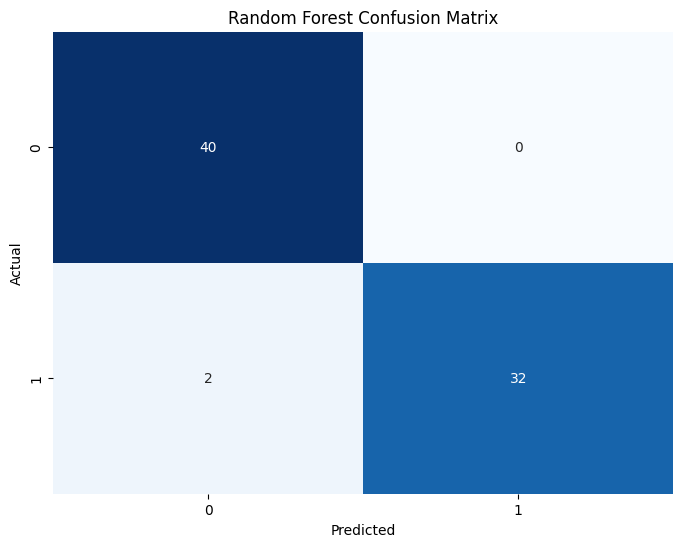

In [ ]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **HYPERPARAMETER TUNING USING GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],    #number of trees in the forest
    'max_depth': [None, 10, 20],   #maximum depth of the trees
    # Add other relevant hyperparameters if u wnat
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search.best_params_

# Train the model with the best parameters on the entire training set
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
accuracy_percentage_best_rf = accuracy_best_rf * 100

print(f"Random Forest Test Accuracy (Best Parameters): {accuracy_percentage_best_rf:.2f}%")
print()
print("Best Parameters:", best_params_rf)

Random Forest Test Accuracy (Best Parameters): 97.30%

Best Parameters: {'max_depth': None, 'n_estimators': 50}


# **PREDICTION USING CUSTOM INPUT**

In [ ]:
# Example custom input
custom_input = pd.DataFrame({
    'Age': [50],
    'ShortnessBreath': [1],
    'Oxygen': [85],
    'PulseRate': [115],
    'Temperature': [96]
})

# Make predictions with the trained model
custom_predictions = best_rf_model.predict(custom_input)

# Display the predictions
print("Custom Input Predictions:", custom_predictions)


Custom Input Predictions: [1]


# **TRAINING CURVE:Loss curve**

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

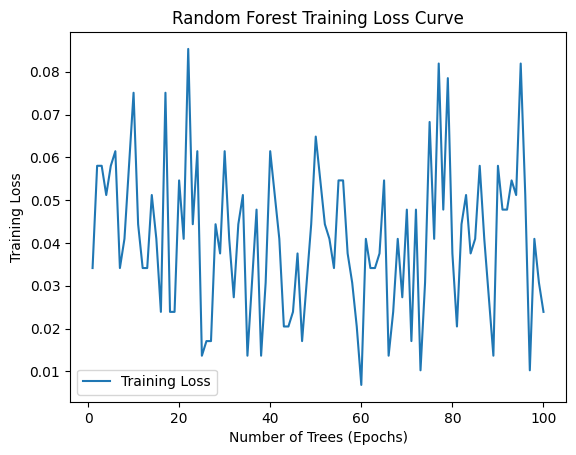

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming your dataset is stored in a DataFrame called 'df'
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on training data
train_losses = []
for tree in rf_model.estimators_:
    train_loss = np.mean(tree.predict(X_train) != y_train)
    train_losses.append(train_loss)

# Plot the training loss over the number of trees (epochs)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Number of Trees (Epochs)')
plt.ylabel('Training Loss')
plt.title('Random Forest Training Loss Curve')
plt.legend()
plt.show()

# **TRAINING CURVE:Validation curve**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

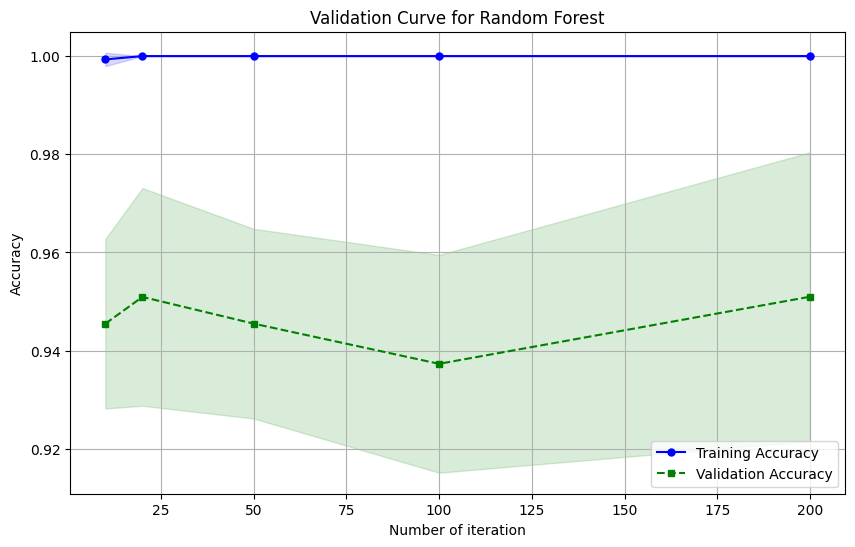

In [ ]:
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Define the hyperparameter range (e.g., number of trees in a Random Forest)
param_range = [10, 20, 50, 100, 200]

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Generate the validation curve
train_scores, test_scores = validation_curve(
    rf_model, X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", cv=5, n_jobs=-1
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Validation Curve for Random Forest')
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# **COMBINED ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

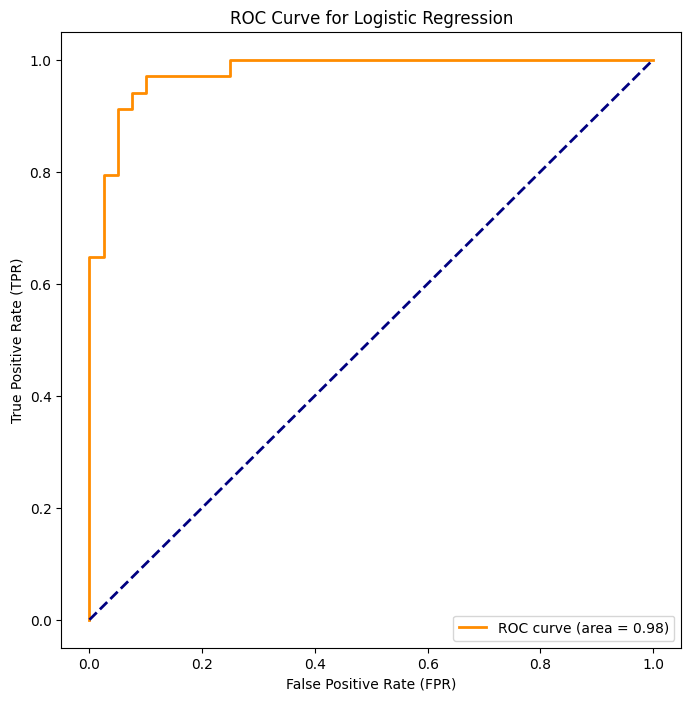

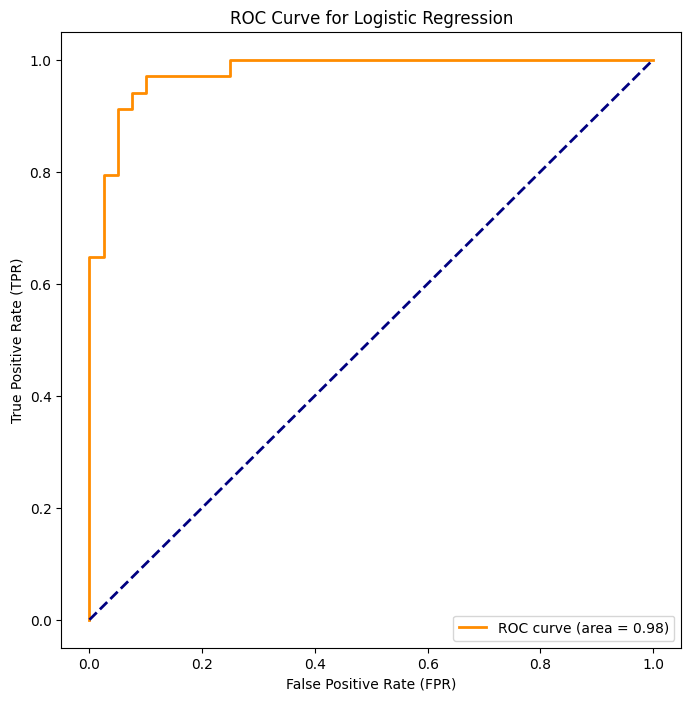

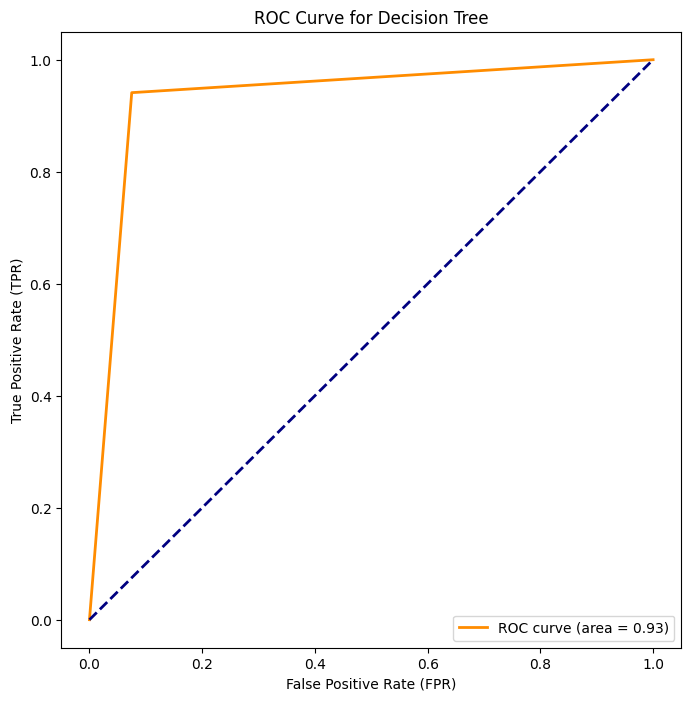

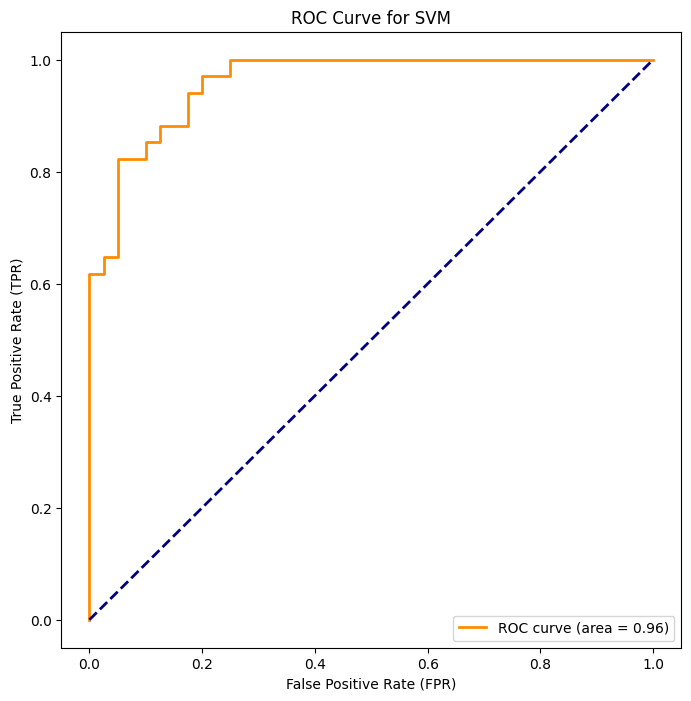

In [ ]:
logistic_model = LogisticRegression()  # Initialize your Logistic Regression model
logistic_model.fit(X_train, y_train)  # Train  model

y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()
#L.R
logistic_model = LogisticRegression()  # Initialize your Logistic Regression model
logistic_model.fit(X_train, y_train)  # Train  model

y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

#D.T
decision_tree_model = DecisionTreeClassifier()  # Initialize your Decision Tree model
decision_tree_model.fit(X_train, y_train)  # Train  model

y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, y_prob_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 8))
plt.plot(fpr_decision_tree, tpr_decision_tree, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_decision_tree))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

#SVM
svm_model = SVC(probability=True)  # Initialize SVM model with probability=True
svm_model.fit(X_train, y_train)  # Train  model

y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


# **Combined ROC**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

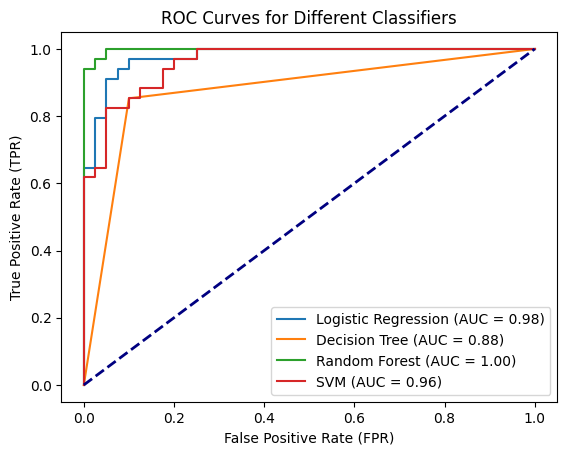

In [ ]:

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, y_prob_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_decision_tree))

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.show()



# **CROSS VALIDATION USING STRATIFIED K FOLD**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [ ]:
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Specify the number of folds for stratified cross-validation
num_folds = 5  # Adjust the number of folds as needed

# Create a StratifiedKFold object for cross-validation
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform stratified cross-validation and obtain accuracy scores for each fold
accuracy_scores = cross_val_score(rf_model, X, y, cv=stratified_kf, scoring='accuracy')

# Convert accuracy scores to percentage format
accuracy_scores_percentage = accuracy_scores * 100

# Print the accuracy scores for each fold in percentage format
for i, score in enumerate(accuracy_scores_percentage, start=1):
    print(f'Fold {i}: Accuracy = {score:.2f}%')

# Calculate and print the mean and standard deviation of the accuracy scores in percentage format
mean_accuracy_percentage = np.mean(accuracy_scores_percentage)
std_accuracy_percentage = np.std(accuracy_scores_percentage)
print(f'\nMean Accuracy: {mean_accuracy_percentage:.2f}% (+/- {std_accuracy_percentage:.2f}%)')


Fold 1: Accuracy = 93.24%
Fold 2: Accuracy = 91.89%
Fold 3: Accuracy = 94.52%
Fold 4: Accuracy = 97.26%
Fold 5: Accuracy = 97.26%

Mean Accuracy: 94.84% (+/- 2.15%)


# **LEARNING RATE**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Epoch 1/20
10/10 [==============================] - 1s 36ms/step - loss: 0.6271 - accuracy: 0.7167 - val_loss: 0.6168 - val_accuracy: 0.7973 - lr: 0.0100
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6030 - accuracy: 0.7918 - val_loss: 0.5943 - val_accuracy: 0.8514 - lr: 0.0098
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5823 - accuracy: 0.8123 - val_loss: 0.5741 - val_accuracy: 0.8919 - lr: 0.0094
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5640 - accuracy: 0.8464 - val_loss: 0.5558 - val_accuracy: 0.9189 - lr: 0.0088
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.8737 - val_loss: 0.5400 - val_accuracy: 0.9189 - lr: 0.0081
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5330 - accuracy: 0.8942 - val_loss: 0.5274 - val_accuracy: 0.9189 - lr: 0.0073
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5216 - 

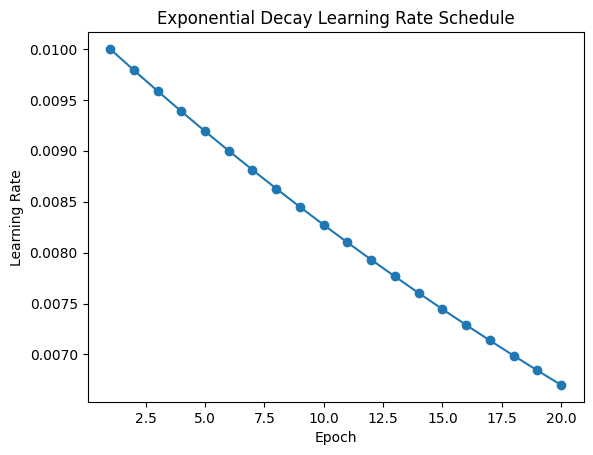

In [ ]:
# For simplicity, let's generate some random data
np.random.seed(42)
X = np.random.rand(1000, 5)
y = (X.sum(axis=1) > 2.5).astype(int)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an initial learning rate
initial_learning_rate = 0.01
sgd = SGD(learning_rate=initial_learning_rate)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate schedule function (Exponential Decay in this example)
def learning_rate_schedule(epoch, lr):
    decay_rate = 0.9
    decay_steps = 5
    return lr * decay_rate**(epoch / decay_steps)

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Optionally, you can visualize the learning rate schedule
import matplotlib.pyplot as plt

# Extract the learning rates for each epoch
learning_rates = [learning_rate_schedule(epoch, initial_learning_rate) for epoch in range(20)]

# Plot the learning rate schedule
plt.plot(range(1, 21), learning_rates, marker='o')
plt.title('Exponential Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()
